In [85]:
import numpy as np
import matplotlib.pyplot as plt # type: ignore
from scipy import sparse
import scipy
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import tqdm
import imageio

%run ../Scripts/trajectory.py
%run ../Scripts/trajectoryVisual.py
%run ../Scripts/trajsTree.py
%run ../Scripts/supMethods.py
%run ../Scripts/formulas.py
foldername = "../Data_HGT_rate_Single3"

In [4]:
foldername

'../Data_HGT_rate_Single3'

In [101]:
from supMethods import load_outputs, read_json

params, sim_params = read_json(foldername)
n, nh, f = load_outputs(foldername, 50, True)
t_domain = get_tdomain(foldername, False)

In [34]:
x_lim = sim_params["xdomain"]
x_flat = np.arange(-1*x_lim, x_lim)
y_flat = np.arange(-1*x_lim, x_lim)
x, y = np.meshgrid(x_flat, y_flat)

In [102]:
t_domain = t_domain[10:210]

In [61]:
n, nh = load_outputs(foldername, 100)
n

<2000x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 1086 stored elements in Dictionary Of Keys format>

In [62]:
mean, _, _ = fit_GMM(n, params, sim_params)

In [63]:
def restrict(arr, mean, size):
    try:
        x, y = mean
    except ValueError:
        x, y = mean.squeeze()
    x = int(x)
    y = int(y)
        
    half_size = size // 2
    x_min = max(0, x - half_size)
    x_max = min(arr.shape[0], x + half_size)
    y_min = max(0, y - half_size)
    y_max = min(arr.shape[1], y + half_size)

    return arr[x_min:x_max, y_min:y_max]


(0.0, 5.0)

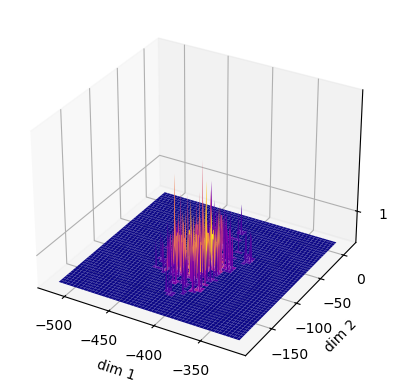

In [109]:
n, nh = load_outputs(foldername, 100, False)    
mean, _, _ = fit_GMM(n, params, sim_params)

n_array = n.toarray()
n_restricted = restrict(n_array, mean, 200)
x_restricted = restrict(x, mean, 200)
y_restricted = restrict(y, mean, 200)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
z2 = n_restricted
surf2 = ax.plot_surface(x_restricted, y_restricted, z2, cmap='plasma')

# Customize labels
ax.set_xlabel('dim 1')
ax.set_ylabel('dim 2')
ax.set_zticks([1])

ax.set_zlabel('Custom Z Label')
ax.set_zlim(0, 5)

In [106]:
for t in t_domain:
    n, nh = load_outputs(foldername, t, False)    
    mean, _, _ = fit_GMM(n, params, sim_params)

    n_array = n.toarray()
    n_restricted = restrict(n_array, mean, 200)
    x_restricted = restrict(x, mean, 200)
    y_restricted = restrict(y, mean, 200)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    z2 = n_restricted
    surf2 = ax.plot_surface(x_restricted, y_restricted, z2, cmap='plasma', antialiased=False)

    # Customize labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_xlabel('dim 1')
    ax.set_ylabel('dim 2')
    ax.set_zticks([1])

    ax.set_zlim(0, 5)

    plt.savefig(f'{foldername}/time_plots/img3d_{t}.png', 
                        transparent = False, facecolor = 'white')
    plt.close("all")

In [107]:
frames = []

for i in t_domain:
        image = imageio.v2.imread(f'./{foldername}/time_plots/img3d_{i}.png')
        frames.append(image)

imageio.mimsave(f'./{foldername}/time_plots/Animation3D.gif', 
                    frames)